In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
resorts = pd.read_csv('data/resorts.csv',index_col= 'ID', encoding = 'latin-1')

In [3]:
resorts

,Resort,Latitude,Longitude,Country,Continent,Price,Season,Highest point,Lowest point,Beginner slopes,...,Snow cannons,Surface lifts,Chair lifts,Gondola lifts,Total lifts,Lift capacity,Child friendly,Snowparks,Nightskiing,Summer skiing
ID,,,,,,,,,,,,,,,,,,,,,
1,Hemsedal,60.928244,8.383487,Norway,Europe,46,November - May,1450,620,29,...,325,15,6,0,21,22921,Yes,Yes,Yes,No
2,Geilosiden Geilo,60.534526,8.206372,Norway,Europe,44,November - April,1178,800,18,...,100,18,6,0,24,14225,Yes,Yes,Yes,No
3,Golm,47.057810,9.828167,Austria,Europe,48,December - April,2110,650,13,...,123,4,4,3,11,16240,Yes,No,No,No
4,Red Mountain Resort-Rossland,49.105520,-117.846280,Canada,North America,60,December - April,2075,1185,20,...,0,2,5,1,8,9200,Yes,Yes,Yes,No
5,Hafjell,61.230369,10.529014,Norway,Europe,45,November - April,1030,195,33,...,150,14,3,1,18,21060,Yes,Yes,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,Puigmal,42.395007,2.108883,France,Europe,0,Unknown,2700,1830,9,...,0,11,2,0,13,11865,Yes,No,No,No
496,Kranzberg-Mittenwald,47.451359,11.228630,Germany,Europe,29,December,1350,980,6,...,8,9,1,0,10,5850,Yes,Yes,Yes,No
497,Wetterstein lifts-Wettersteinbahnen- Ehrwald,47.406897,10.927998,Austria,Europe,43,December - March,1530,1000,15,...,33,6,4,0,10,5425,Yes,Yes,No,No


In [4]:
resorts.describe()

,Latitude,Longitude,Price,Highest point,Lowest point,Beginner slopes,Intermediate slopes,Difficult slopes,Total slopes,Longest run,Snow cannons,Surface lifts,Chair lifts,Gondola lifts,Total lifts,Lift capacity
count,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000
mean,43.205684,-6.006784,48.721443,2160.589178,1200.631263,31.819639,37.921844,16.164329,85.905812,3.545090,179.136273,11.282565,9.721443,3.258517,24.262525,31650.961924
std,15.975790,59.990459,21.718733,774.339805,596.142294,47.401764,44.358524,20.115855,100.874157,3.947887,372.321111,13.365360,11.461502,5.867967,27.672736,40781.986019
min,-45.054960,-149.740657,0.000000,163.000000,36.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,43.672650,1.380975,36.000000,1594.000000,800.000000,10.000000,12.000000,3.000000,30.000000,0.000000,0.000000,3.000000,3.000000,0.000000,10.000000,11645.000000
50%,46.347316,8.206372,45.000000,2175.000000,1121.000000,18.000000,25.000000,9.000000,55.000000,3.000000,15.000000,7.000000,6.000000,1.000000,15.000000,18510.000000
75%,47.327089,12.429237,54.000000,2700.000000,1500.000000,30.000000,45.000000,21.000000,100.000000,6.000000,180.000000,14.000000,11.500000,4.000000,26.000000,32829.000000
max,67.784406,176.876668,141.000000,3914.000000,3286.000000,312.000000,239.000000,126.000000,600.000000,16.000000,2383.000000,89.000000,74.000000,40.000000,174.000000,252280.000000


In [5]:
resorts.loc[resorts.Price == 0]

,Resort,Latitude,Longitude,Country,Continent,Price,Season,Highest point,Lowest point,Beginner slopes,...,Snow cannons,Surface lifts,Chair lifts,Gondola lifts,Total lifts,Lift capacity,Child friendly,Snowparks,Nightskiing,Summer skiing
ID,,,,,,,,,,,,,,,,,,,,,
196,Perisher,-36.396167,148.408582,Australia,Oceania,0,June - October,1605,1125,22,...,271,34,14,1,49,46975,Yes,Yes,Yes,Yes
235,Yellowstone Club,45.668198,-111.067446,United States,North America,0,November - April,3005,2182,30,...,0,4,11,0,15,14886,Yes,No,No,No
335,Pragelato,45.016217,6.942453,Italy,Europe,0,December - April,2700,1335,14,...,0,4,1,0,5,3660,Yes,No,No,No
349,Uludag?-Bursa,40.070529,29.222010,Turkey,Asia,0,Unknown,1767,395,10,...,0,8,6,2,16,19637,Yes,Yes,No,No
369,Palando?ken-Ejder 3200 World Ski Center-,39.543016,42.915247,Turkey,Asia,0,November - April,3176,2200,19,...,0,3,11,2,16,15390,Yes,Yes,Yes,No
387,High1 Resort,37.207294,128.824816,South Korea,Asia,0,December - April,1367,690,4,...,0,1,6,4,11,26685,Yes,No,No,No
390,Alpika Service,43.667196,40.246821,Russia,Europe,0,December - April,2228,535,10,...,0,1,1,7,9,18120,Yes,No,No,No
475,Sun Mountain-Yabuli,44.929398,128.604393,China,Asia,0,November - April,1375,457,3,...,0,4,2,0,6,13776,Yes,No,No,No
495,Puigmal,42.395007,2.108883,France,Europe,0,Unknown,2700,1830,9,...,0,11,2,0,13,11865,Yes,No,No,No


In [6]:
resorts = resorts.loc[resorts.Price != 0]

In [7]:
resorts.loc[resorts['Beginner slopes'] == 0]

,Resort,Latitude,Longitude,Country,Continent,Price,Season,Highest point,Lowest point,Beginner slopes,...,Snow cannons,Surface lifts,Chair lifts,Gondola lifts,Total lifts,Lift capacity,Child friendly,Snowparks,Nightskiing,Summer skiing
ID,,,,,,,,,,,,,,,,,,,,,
88,Aspen Mountain,39.176099,-106.829206,United States,North America,124,November - April,3418,2422,0,...,0,0,7,1,8,13400,Yes,No,No,No
100,Elfer Neustift,47.106469,11.307983,Austria,Europe,29,December - March,2080,981,0,...,0,3,0,1,4,2980,Yes,No,No,No
404,Wendelstein-Brannenburg-?Osterhofen,49.355942,11.144105,Germany,Europe,35,December - March,1723,791,0,...,0,2,0,2,4,3250,Yes,No,No,No
479,Diavolezza-?Lagalb,46.429214,9.977345,Switzerland,Europe,59,"October - November, December - May, June - Oct...",3006,2091,0,...,20,9,2,0,11,3970,Yes,No,No,Yes


In [8]:
resorts.loc[resorts['Intermediate slopes'] == 0]

,Resort,Latitude,Longitude,Country,Continent,Price,Season,Highest point,Lowest point,Beginner slopes,...,Snow cannons,Surface lifts,Chair lifts,Gondola lifts,Total lifts,Lift capacity,Child friendly,Snowparks,Nightskiing,Summer skiing
ID,,,,,,,,,,,,,,,,,,,,,
7,Porter,-39.670988,176.876668,New Zealand,Oceania,61,June - September,1980,1300,5,...,0,5,1,0,6,5600,No,No,No,Yes
9,Hochschwarzeck,47.628373,12.920528,Germany,Europe,22,December - April,1385,1030,4,...,0,3,1,0,4,2880,Yes,No,No,No
65,La Grave - La Meije,45.045453,6.306722,France,Europe,49,December - April,3534,1470,3,...,0,1,0,2,3,1460,Yes,No,No,No
205,Oberau (Wildscho?nau),47.423497,12.030743,Austria,Europe,30,December - March,1130,900,1,...,0,2,0,0,2,1932,Yes,No,No,No
427,Indoor ski area Snow Arena-Druskininkai,54.031730,23.960042,Lithuania,Europe,29,Year-round,163,97,1,...,16,4,1,0,5,2800,Yes,Yes,Yes,Yes


In [9]:
resorts.loc[resorts['Difficult slopes'] == 0]

,Resort,Latitude,Longitude,Country,Continent,Price,Season,Highest point,Lowest point,Beginner slopes,...,Snow cannons,Surface lifts,Chair lifts,Gondola lifts,Total lifts,Lift capacity,Child friendly,Snowparks,Nightskiing,Summer skiing
ID,,,,,,,,,,,,,,,,,,,,,
9,Hochschwarzeck,47.628373,12.920528,Germany,Europe,22,December - April,1385,1030,4,...,0,3,1,0,4,2880,Yes,No,No,No
10,Rossfeld - Berchtesgaden - Oberau,47.651306,13.058977,Germany,Europe,20,December - April,1554,1300,7,...,0,4,0,0,4,3229,Yes,Yes,Yes,No
23,Howelsen Hill-Steamboat Springs,40.480533,-106.840605,United States,North America,21,November - April,2175,2040,1,...,0,3,1,0,4,2220,No,No,No,No
39,Reither Kogel-Reith im Alpbachtal,47.400542,11.860118,Austria,Europe,46,December - March,1280,670,1,...,0,4,0,1,5,4070,Yes,No,Yes,No
56,Fonna Glacier,60.216882,6.435787,Norway,Europe,42,May - September,1460,1200,2,...,0,1,0,0,1,1200,Yes,Yes,No,Yes
64,Pont d'Espagne - Cauterets,42.851011,-0.139921,France,Europe,35,November - April,1756,1516,3,...,0,2,1,1,4,4150,Yes,No,No,No
65,La Grave - La Meije,45.045453,6.306722,France,Europe,49,December - April,3534,1470,3,...,0,1,0,2,3,1460,Yes,No,No,No
77,Balme-?Les Autannes-Vallorcine-?Le Tour,46.285683,4.780410,France,Europe,51,December - April,2270,1453,13,...,0,8,2,2,12,14860,Yes,Yes,No,No
100,Elfer Neustift,47.106469,11.307983,Austria,Europe,29,December - March,2080,981,0,...,0,3,0,1,4,2980,Yes,No,No,No


In [10]:
resorts.loc[resorts['Longest run'] == 0]

,Resort,Latitude,Longitude,Country,Continent,Price,Season,Highest point,Lowest point,Beginner slopes,...,Snow cannons,Surface lifts,Chair lifts,Gondola lifts,Total lifts,Lift capacity,Child friendly,Snowparks,Nightskiing,Summer skiing
ID,,,,,,,,,,,,,,,,,,,,,
6,Voss,60.683706,6.407905,Norway,Europe,43,November - May,960,284,25,...,40,7,4,0,11,11900,Yes,Yes,No,No
7,Porter,-39.670988,176.876668,New Zealand,Oceania,61,June - September,1980,1300,5,...,0,5,1,0,6,5600,No,No,No,Yes
9,Hochschwarzeck,47.628373,12.920528,Germany,Europe,22,December - April,1385,1030,4,...,0,3,1,0,4,2880,Yes,No,No,No
16,Treble Cone,-44.632375,168.872825,New Zealand,Oceania,68,June - October,1960,1260,4,...,32,2,2,0,4,4520,No,Yes,No,Yes
19,Les Gets (Les Portes du Soleil),46.155098,6.663331,France,Europe,51,December - April,2466,1000,310,...,1074,89,74,11,174,252280,Yes,Yes,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
489,Kaiseregg-?Riggisalp-Schwarzsee,46.652497,7.319056,Switzerland,Europe,34,December - March,1750,1050,14,...,46,11,3,1,15,5790,Yes,Yes,Yes,No
490,St. Pierre de Chartreuse-Le Planolet,45.342269,5.814686,France,Europe,21,December - April,1800,900,18,...,35,3,2,0,5,12610,Yes,No,No,No
491,Loon Mountain,44.516452,-74.649625,United States,North America,73,November - April,930,300,15,...,0,2,9,1,12,17034,Yes,Yes,No,No


array([[<Axes: title={'center': 'Longest run'}>]], dtype=object)

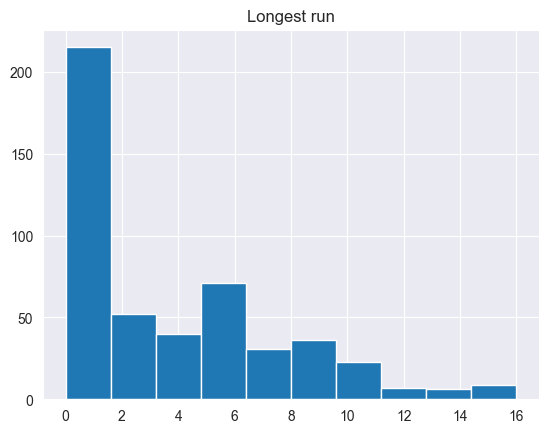

In [11]:
resorts.loc[:, ['Longest run']].hist()

<Axes: xlabel='Longest run', ylabel='Total lifts'>

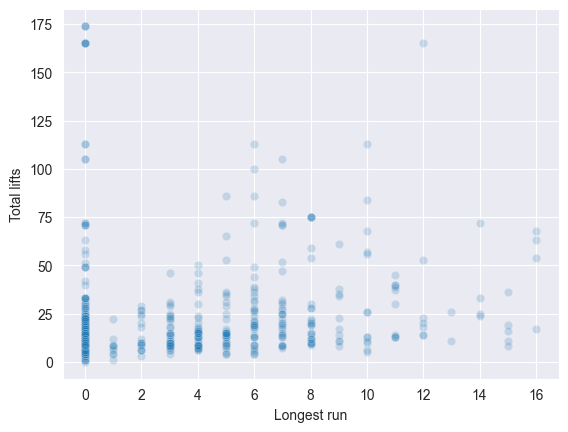

In [12]:
sns.scatterplot(resorts, x = 'Longest run', y = 'Total lifts', alpha = .2)

In [13]:
resorts.loc[resorts['Total lifts'] == 0]

,Resort,Latitude,Longitude,Country,Continent,Price,Season,Highest point,Lowest point,Beginner slopes,...,Snow cannons,Surface lifts,Chair lifts,Gondola lifts,Total lifts,Lift capacity,Child friendly,Snowparks,Nightskiing,Summer skiing
ID,,,,,,,,,,,,,,,,,,,,,
234,Mzaar Kfardebian,33.972129,35.839567,Lebanon,Asia,51,Unknown,2465,1850,46,...,0,0,0,0,0,0,Yes,No,No,No


In [14]:
resorts = resorts.loc[resorts['Total lifts'] != 0]

In [15]:
resorts.loc[resorts['Lift capacity'] == 0]

,Resort,Latitude,Longitude,Country,Continent,Price,Season,Highest point,Lowest point,Beginner slopes,...,Snow cannons,Surface lifts,Chair lifts,Gondola lifts,Total lifts,Lift capacity,Child friendly,Snowparks,Nightskiing,Summer skiing
ID,,,,,,,,,,,,,,,,,,,,,
51,Ben Lomond,-30.023715,151.659179,Australia,Oceania,47,July - September,1572,1460,2,...,0,0,7,0,7,0,Yes,No,No,Yes
300,Oppdal,62.535178,9.623304,Norway,Europe,44,Unknown,1300,585,40,...,0,1,0,0,1,0,Yes,No,No,No


<Axes: xlabel='Total lifts', ylabel='Lift capacity'>

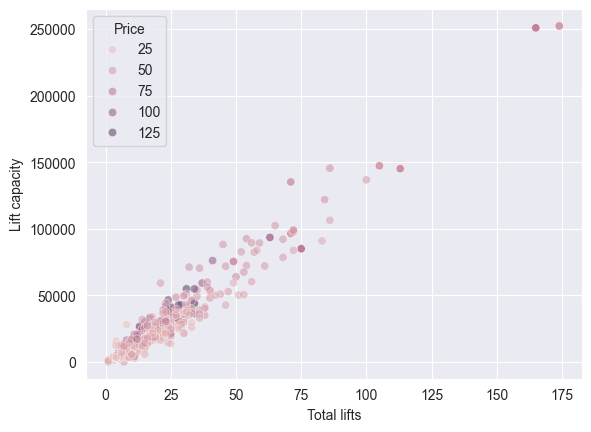

In [16]:
sns.scatterplot(data = resorts, x = 'Total lifts', y = 'Lift capacity', hue = 'Price', alpha = .5)

In [17]:
yes_true = {'Yes': True, 'No': False}
resorts = resorts.replace({'Child friendly': yes_true, 'Snowparks': yes_true, 'Nightskiing': yes_true, 'Summer skiing': yes_true})

C:\Users\theru\AppData\Local\Temp\ipykernel_17712\1013927248.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  resorts = resorts.replace({'Child friendly': yes_true, 'Snowparks': yes_true, 'Nightskiing': yes_true, 'Summer skiing': yes_true})


In [18]:
resorts

,Resort,Latitude,Longitude,Country,Continent,Price,Season,Highest point,Lowest point,Beginner slopes,...,Snow cannons,Surface lifts,Chair lifts,Gondola lifts,Total lifts,Lift capacity,Child friendly,Snowparks,Nightskiing,Summer skiing
ID,,,,,,,,,,,,,,,,,,,,,
1,Hemsedal,60.928244,8.383487,Norway,Europe,46,November - May,1450,620,29,...,325,15,6,0,21,22921,True,True,True,False
2,Geilosiden Geilo,60.534526,8.206372,Norway,Europe,44,November - April,1178,800,18,...,100,18,6,0,24,14225,True,True,True,False
3,Golm,47.057810,9.828167,Austria,Europe,48,December - April,2110,650,13,...,123,4,4,3,11,16240,True,False,False,False
4,Red Mountain Resort-Rossland,49.105520,-117.846280,Canada,North America,60,December - April,2075,1185,20,...,0,2,5,1,8,9200,True,True,True,False
5,Hafjell,61.230369,10.529014,Norway,Europe,45,November - April,1030,195,33,...,150,14,3,1,18,21060,True,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494,Gra?chen,46.196018,7.842161,Switzerland,Europe,48,December - April,2864,1619,9,...,0,9,5,1,15,13860,True,False,False,False
496,Kranzberg-Mittenwald,47.451359,11.228630,Germany,Europe,29,December,1350,980,6,...,8,9,1,0,10,5850,True,True,True,False
497,Wetterstein lifts-Wettersteinbahnen- Ehrwald,47.406897,10.927998,Austria,Europe,43,December - March,1530,1000,15,...,33,6,4,0,10,5425,True,True,False,False


In [19]:
resorts['Elevation'] = resorts['Highest point'] - resorts['Lowest point']
resorts['Average_lift_capacity']  = resorts['Lift capacity'] / resorts['Total lifts']


In [20]:
y = resorts[['Price']]
X = resorts.drop(['Price', 'Resort', 'Season'], axis = 1)

In [21]:
geo = ['Latitude', 'Longitude', 'Continent', 'Country']
mtn = ['Highest point', 'Lowest point', 'Elevation']
slopes = ['Beginner slopes', 'Intermediate slopes', 'Difficult slopes', 'Total slopes', 'Longest run']
lifts = ['Surface lifts', 'Chair lifts', 'Gondola lifts', 'Total lifts', 'Lift capacity', 'Average_lift_capacity']
amenities = ['Child friendly', 'Snowparks', 'Nightskiing', 'Summer skiing']

In [22]:
X[geo]

,Latitude,Longitude,Continent,Country
ID,,,,
1,60.928244,8.383487,Europe,Norway
2,60.534526,8.206372,Europe,Norway
3,47.057810,9.828167,Europe,Austria
4,49.105520,-117.846280,North America,Canada
5,61.230369,10.529014,Europe,Norway
...,...,...,...,...
494,46.196018,7.842161,Europe,Switzerland
496,47.451359,11.228630,Europe,Germany
497,47.406897,10.927998,Europe,Austria


In [23]:
X[mtn]

,Highest point,Lowest point,Elevation
ID,,,
1,1450,620,830
2,1178,800,378
3,2110,650,1460
4,2075,1185,890
5,1030,195,835
...,...,...,...
494,2864,1619,1245
496,1350,980,370
497,1530,1000,530


In [24]:
X[slopes]

,Beginner slopes,Intermediate slopes,Difficult slopes,Total slopes,Longest run
ID,,,,,
1,29,10,4,43,6
2,18,12,4,34,2
3,13,12,1,26,9
4,20,50,50,120,7
5,33,7,4,44,6
...,...,...,...,...,...
494,9,31,2,42,7
496,6,7,2,15,2
497,15,5,3,23,3


In [25]:
X[lifts]

,Surface lifts,Chair lifts,Gondola lifts,Total lifts,Lift capacity,Average_lift_capacity
ID,,,,,,
1,15,6,0,21,22921,1091.476190
2,18,6,0,24,14225,592.708333
3,4,4,3,11,16240,1476.363636
4,2,5,1,8,9200,1150.000000
5,14,3,1,18,21060,1170.000000
...,...,...,...,...,...,...
494,9,5,1,15,13860,924.000000
496,9,1,0,10,5850,585.000000
497,6,4,0,10,5425,542.500000


<Axes: >

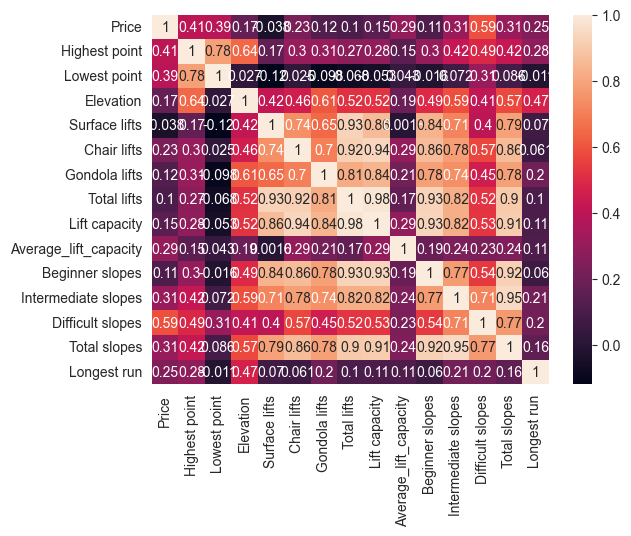

In [26]:
X[mtn + lifts + slopes].corr()
sns.heatmap(y.join(X[mtn + lifts + slopes]).corr(), annot=True)

In [27]:
X = X.drop(['Latitude', 'Longitude'], axis = 1)

In [28]:
cat = ['Country', 'Continent'] + amenities
X_cat = X[cat]
X_num = X.drop(cat, axis = 1)

In [29]:
X_cat

,Country,Continent,Child friendly,Snowparks,Nightskiing,Summer skiing
ID,,,,,,
1,Norway,Europe,True,True,True,False
2,Norway,Europe,True,True,True,False
3,Austria,Europe,True,False,False,False
4,Canada,North America,True,True,True,False
5,Norway,Europe,True,True,True,False
...,...,...,...,...,...,...
494,Switzerland,Europe,True,False,False,False
496,Germany,Europe,True,True,True,False
497,Austria,Europe,True,True,False,False


array([[<Axes: title={'center': 'Highest point'}>,
        <Axes: title={'center': 'Lowest point'}>,
        <Axes: title={'center': 'Beginner slopes'}>,
        <Axes: title={'center': 'Intermediate slopes'}>],
       [<Axes: title={'center': 'Difficult slopes'}>,
        <Axes: title={'center': 'Total slopes'}>,
        <Axes: title={'center': 'Longest run'}>,
        <Axes: title={'center': 'Snow cannons'}>],
       [<Axes: title={'center': 'Surface lifts'}>,
        <Axes: title={'center': 'Chair lifts'}>,
        <Axes: title={'center': 'Gondola lifts'}>,
        <Axes: title={'center': 'Total lifts'}>],
       [<Axes: title={'center': 'Lift capacity'}>,
        <Axes: title={'center': 'Elevation'}>,
        <Axes: title={'center': 'Average_lift_capacity'}>, <Axes: >]],
      dtype=object)

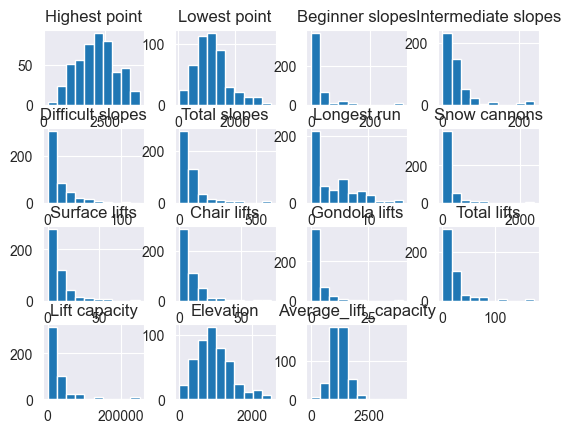

In [30]:
X_num.hist()

In [31]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer()
X_num_transformed = pd.DataFrame(pt.fit_transform(X_num), columns = pt.get_feature_names_out(), index = X_num.index)
X_num_transformed

,Highest point,Lowest point,Beginner slopes,Intermediate slopes,Difficult slopes,Total slopes,Longest run,Snow cannons,Surface lifts,Chair lifts,Gondola lifts,Total lifts,Lift capacity,Elevation,Average_lift_capacity
ID,,,,,,,,,,,,,,,
1,-0.902497,-1.000960,0.450371,-0.774095,-0.560715,-0.252726,0.872707,1.123081,0.744224,-0.039096,-1.175494,0.323057,0.091779,-0.158123,-0.299432
2,-1.275513,-0.606910,0.007813,-0.621915,-0.560715,-0.474842,0.024253,0.749388,0.929012,-0.039096,-1.175494,0.482507,-0.362323,-1.282723,-1.736636
3,-0.035335,-0.931568,-0.290246,-0.621915,-1.322565,-0.721635,1.224523,0.816952,-0.521301,-0.434944,0.650006,-0.483464,-0.239737,1.032839,0.658908
4,-0.080224,0.105280,0.105117,0.713699,1.485309,0.781704,1.004787,-1.043872,-1.085328,-0.219639,-0.132132,-0.897216,-0.747418,-0.031219,-0.147185
5,-1.483568,-2.283148,0.570967,-1.057890,-0.560715,-0.230684,0.872707,0.880960,0.674682,-0.701092,-0.132132,0.135752,0.008578,-0.147404,-0.095754
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494,0.908674,0.776890,-0.620679,0.239568,-0.988504,-0.275232,1.004787,-1.043872,0.235971,-0.219639,-0.132132,-0.090011,-0.386067,0.656464,-0.751085
496,-1.038360,-0.256114,-0.973290,-1.057890,-0.988504,-1.203248,0.024253,-0.120944,0.235971,-1.546651,-1.175494,-0.606418,-1.119577,-1.306694,-1.761501
497,-0.794774,-0.219250,-0.159701,-1.307317,-0.748543,-0.831892,0.314347,0.374874,-0.152547,-0.434944,-1.175494,-0.606418,-1.178949,-0.861555,-1.900615


array([[<Axes: title={'center': 'Highest point'}>,
        <Axes: title={'center': 'Lowest point'}>,
        <Axes: title={'center': 'Beginner slopes'}>,
        <Axes: title={'center': 'Intermediate slopes'}>],
       [<Axes: title={'center': 'Difficult slopes'}>,
        <Axes: title={'center': 'Total slopes'}>,
        <Axes: title={'center': 'Longest run'}>,
        <Axes: title={'center': 'Snow cannons'}>],
       [<Axes: title={'center': 'Surface lifts'}>,
        <Axes: title={'center': 'Chair lifts'}>,
        <Axes: title={'center': 'Gondola lifts'}>,
        <Axes: title={'center': 'Total lifts'}>],
       [<Axes: title={'center': 'Lift capacity'}>,
        <Axes: title={'center': 'Elevation'}>,
        <Axes: title={'center': 'Average_lift_capacity'}>, <Axes: >]],
      dtype=object)

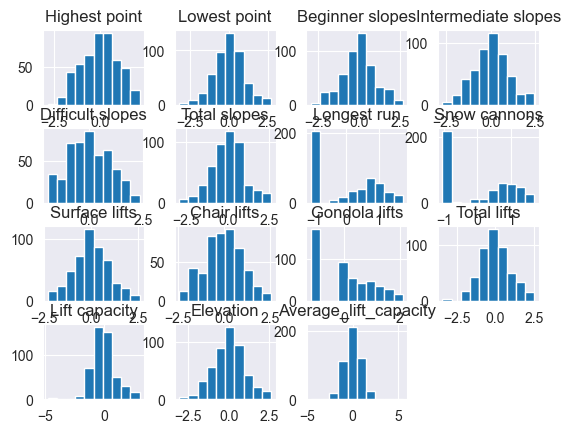

In [32]:
X_num_transformed.hist()

In [33]:
from sklearn.preprocessing import OneHotEncoder

In [34]:
OHE = OneHotEncoder(sparse_output=False, drop = 'first')
X_cat_encoded = OHE.fit_transform(X_cat[['Country', 'Continent']])
X_cat_encoded = pd.DataFrame(X_cat_encoded, columns = OHE.get_feature_names_out(), index = X_cat.index).join(X_cat.drop(['Country', 'Continent'], axis = 1))
X_cat_encoded

,Country_Argentina,Country_Australia,Country_Austria,Country_Bosnia and Herzegovina,Country_Bulgaria,Country_Canada,Country_Chile,Country_Czech Republic,Country_Finland,Country_France,...,Country_United Kingdom,Country_United States,Continent_Europe,Continent_North America,Continent_Oceania,Continent_South America,Child friendly,Snowparks,Nightskiing,Summer skiing
ID,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,True,True,True,False
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,True,True,True,False
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,True,False,False,False
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,True,True,True,False
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,True,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,True,False,False,False
496,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,True,True,True,False
497,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,True,True,False,False


In [35]:
preds = X_num_transformed.join(X_cat_encoded)
preds

,Highest point,Lowest point,Beginner slopes,Intermediate slopes,Difficult slopes,Total slopes,Longest run,Snow cannons,Surface lifts,Chair lifts,...,Country_United Kingdom,Country_United States,Continent_Europe,Continent_North America,Continent_Oceania,Continent_South America,Child friendly,Snowparks,Nightskiing,Summer skiing
ID,,,,,,,,,,,,,,,,,,,,,
1,-0.902497,-1.000960,0.450371,-0.774095,-0.560715,-0.252726,0.872707,1.123081,0.744224,-0.039096,...,0.0,0.0,1.0,0.0,0.0,0.0,True,True,True,False
2,-1.275513,-0.606910,0.007813,-0.621915,-0.560715,-0.474842,0.024253,0.749388,0.929012,-0.039096,...,0.0,0.0,1.0,0.0,0.0,0.0,True,True,True,False
3,-0.035335,-0.931568,-0.290246,-0.621915,-1.322565,-0.721635,1.224523,0.816952,-0.521301,-0.434944,...,0.0,0.0,1.0,0.0,0.0,0.0,True,False,False,False
4,-0.080224,0.105280,0.105117,0.713699,1.485309,0.781704,1.004787,-1.043872,-1.085328,-0.219639,...,0.0,0.0,0.0,1.0,0.0,0.0,True,True,True,False
5,-1.483568,-2.283148,0.570967,-1.057890,-0.560715,-0.230684,0.872707,0.880960,0.674682,-0.701092,...,0.0,0.0,1.0,0.0,0.0,0.0,True,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494,0.908674,0.776890,-0.620679,0.239568,-0.988504,-0.275232,1.004787,-1.043872,0.235971,-0.219639,...,0.0,0.0,1.0,0.0,0.0,0.0,True,False,False,False
496,-1.038360,-0.256114,-0.973290,-1.057890,-0.988504,-1.203248,0.024253,-0.120944,0.235971,-1.546651,...,0.0,0.0,1.0,0.0,0.0,0.0,True,True,True,False
497,-0.794774,-0.219250,-0.159701,-1.307317,-0.748543,-0.831892,0.314347,0.374874,-0.152547,-0.434944,...,0.0,0.0,1.0,0.0,0.0,0.0,True,True,False,False


array([[<Axes: title={'center': 'Price'}>]], dtype=object)

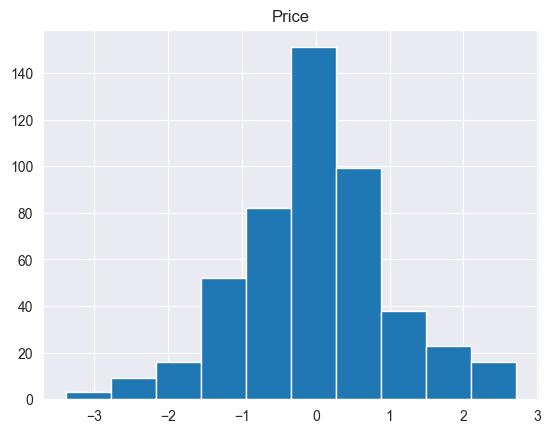

In [36]:
pty = PowerTransformer()
response = pd.DataFrame(pty.fit_transform(y), columns = pty.get_feature_names_out(), index = y.index)
response.hist()

In [37]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(preds, response, test_size = 0.2, random_state = 42)

In [38]:
LR = LinearRegression().fit(X_train, y_train)


In [39]:
pd.DataFrame(LR.coef_, columns = preds.columns).melt().sort_values('value', ascending = False)

,variable,value
52,Continent_Oceania,1.300717e+00
42,Country_South Korea,1.224117e+00
23,Country_Finland,1.066768e+00
35,Country_Norway,1.065662e+00
51,Continent_North America,1.015170e+00
54,Child friendly,9.894925e-01
48,Country_United Kingdom,9.590364e-01
49,Country_United States,8.948199e-01
32,Country_Liechtenstein,8.734926e-01
45,Country_Switzerland,8.643664e-01


In [40]:
from sklearn.feature_selection import SequentialFeatureSelector


In [41]:

forward = SequentialFeatureSelector(LinearRegression(), direction = 'forward',n_jobs = -1, tol = .01)
forward.set_output(transform='pandas')
forward.fit_transform(X_train, y_train)


,Difficult slopes,Longest run,Gondola lifts,Lift capacity,Country_Austria,Country_Canada,Country_Chile,Country_Norway,Country_Switzerland,Country_United States,Continent_Oceania
ID,,,,,,,,,,,
329,-0.748543,1.004787,-1.175494,-0.673247,0.0,0.0,0.0,0.0,1.0,0.0,0.0
141,1.142038,0.872707,1.013288,0.405315,0.0,0.0,0.0,0.0,1.0,0.0,0.0
442,-1.882595,-0.388174,-1.175494,-1.495412,1.0,0.0,0.0,0.0,0.0,0.0,0.0
425,0.115037,-1.102989,-1.175494,-0.794849,0.0,0.0,0.0,0.0,0.0,1.0,0.0
498,-1.882595,-1.102989,-1.175494,-0.351119,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
107,0.325543,1.004787,1.320215,0.975831,1.0,0.0,0.0,0.0,0.0,0.0,0.0
274,0.386099,-1.102989,-1.175494,-0.230560,0.0,0.0,0.0,0.0,0.0,1.0,0.0
354,-0.560715,-1.102989,-0.132132,0.073466,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [54]:
tols = [.001,.005, .01, .02, .04, .08]
ns = range(1, 11)
features = {}
scores = {}
for n in ns:
    forward = SequentialFeatureSelector(LinearRegression(), direction = 'forward',n_jobs = -1, n_features_to_select=n)
    forward.set_output(transform='pandas')
    forward.fit_transform(X_train, y_train)
    features[n] = forward.get_feature_names_out()
    scores[n] = LinearRegression().fit(X_train[features[n]], y_train).score(X_test[features[n]], y_test)
    print(n, scores[n], features[n])


1 0.5399838284119163 ['Difficult slopes']
2 0.634136238139237 ['Difficult slopes' 'Country_United States']
3 0.6427838917279447 ['Difficult slopes' 'Longest run' 'Country_United States']
4 0.6662830234103114 ['Difficult slopes' 'Longest run' 'Country_United States'
 'Continent_Oceania']
5 0.6697152807518834 ['Difficult slopes' 'Longest run' 'Country_Switzerland'
 'Country_United States' 'Continent_Oceania']
6 0.7029503671137797 ['Difficult slopes' 'Longest run' 'Gondola lifts' 'Country_Switzerland'
 'Country_United States' 'Continent_Oceania']
7 0.7064434343195545 ['Difficult slopes' 'Longest run' 'Gondola lifts' 'Country_Canada'
 'Country_Switzerland' 'Country_United States' 'Continent_Oceania']
8 0.7078462705277917 ['Difficult slopes' 'Longest run' 'Gondola lifts' 'Country_Canada'
 'Country_Chile' 'Country_Switzerland' 'Country_United States'
 'Continent_Oceania']
9 0.7140853605377062 ['Difficult slopes' 'Longest run' 'Gondola lifts' 'Country_Austria'
 'Country_Canada' 'Country_Chile

In [57]:
fwd_scores = pd.DataFrame(scores.items(), columns = ['# of features', 'score'])
fwd_scores

,# of features,score
0,1,0.539984
1,2,0.634136
2,3,0.642784
3,4,0.666283
4,5,0.669715
5,6,0.702950
6,7,0.706443
7,8,0.707846
8,9,0.714085
9,10,0.721115


In [ ]:
fwd_scores